In [113]:
import pandas as pd 
# loading dataset
df = pd.read_csv('RealEstate.csv')

In [114]:
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14528 non-null  object 
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Description     14528 non-null  object 
 7   Baths           14528 non-null  int64  
 8   Balcony         14528 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1021.6+ KB


In [116]:
# Dropping all the duplicate values
df.drop_duplicates()
# Dropping column names - Property title, name and Description
df.drop(columns=['Property Title','Name','Description'],inplace=True)

In [117]:
# Creating function to modify Price column values 
def priceStrip(value):
    value = value.replace('₹', '').strip()  
    
    parts = value.split()
    if len(parts) != 2: 
        return None

    num, val = parts
    num = float(num)  

    if val == 'Cr':
        num *= 100  
    return num  

In [118]:
# Applying the function on the column - Price to transform the values
df['Price']=df['Price'].apply(priceStrip)

In [119]:
# Creating function to transform location values into cities 
def cityName(value):
    city = value.split(',')[-1].strip()
    return city

In [120]:
# Creating a new column city, applying the function to the location column
df['City'] = df['Location'].apply(cityName)

In [121]:
# Dropping the column Location
df.drop(columns=['Location'],inplace=True)

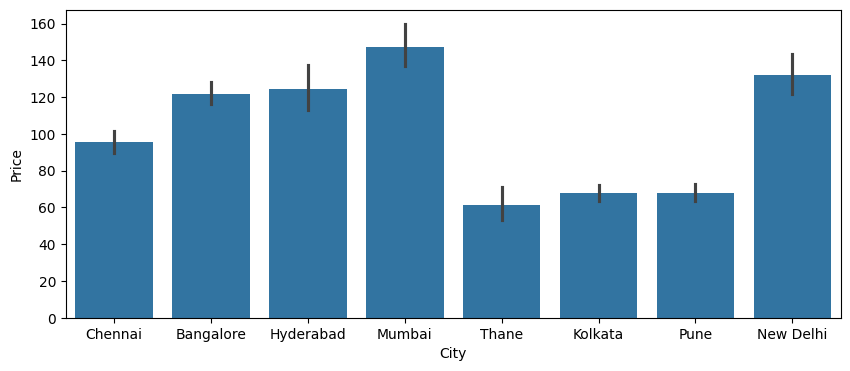

In [122]:
# Checking the distribution of Price across different cities using a barplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.barplot(x=df['City'], y=df['Price'])
plt.show()


In [123]:
# Importing Label Encode to transform values of column Balcony
# Yes - 1 and No -0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Balcony'])
df['Balcony']=encoder.transform(df['Balcony'])

In [124]:
# Importing OneHotEncoder to convert the City column into a one-hot encoded matrix
# Each unique city will be transformed into a separate column, where the presence of a city will be represented by 1, and all other cities will be represented by 0 for each row.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None).set_output(transform='pandas')
encoded_data = encoder.fit_transform(df[['City']])

In [125]:
# Resetting the index of the original dataframe and encoded data to ensure alignment when concatenating
# Concatenating the one-hot encoded city columns to the original dataframe
df = df.reset_index(drop=True)
encoded_data = encoded_data.reset_index(drop=True)
df = pd.concat([df, encoded_data], axis=1)

In [126]:
# Checking missing values in the dataframe
df.isna().sum()

Price             4
Total_Area        0
Price_per_SQFT    0
Baths             0
Balcony           0
City              0
City_Bangalore    0
City_Chennai      0
City_Hyderabad    0
City_Kolkata      0
City_Mumbai       0
City_New Delhi    0
City_Pune         0
City_Thane        0
dtype: int64

In [127]:
# Dropping rows from column Price_per_SQFT whose values are less than 0
# Dropping column City
# Filling missing values of Price column with the mean value of the column
df = df.loc[df['Price_per_SQFT'] > 0].dropna(subset=['Price_per_SQFT'])
df.drop(columns=['City'],inplace=True)
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [128]:
# Checking for any remaining missing values after cleaning the dataframe
df.isna().sum()

Price             0
Total_Area        0
Price_per_SQFT    0
Baths             0
Balcony           0
City_Bangalore    0
City_Chennai      0
City_Hyderabad    0
City_Kolkata      0
City_Mumbai       0
City_New Delhi    0
City_Pune         0
City_Thane        0
dtype: int64

In [129]:
# First 5 rows of the dataframe
df.head()

,Price,Total_Area,Price_per_SQFT,Baths,Balcony,City_Bangalore,City_Chennai,City_Hyderabad,City_Kolkata,City_Mumbai,City_New Delhi,City_Pune,City_Thane
0,199.0,2583,7700.0,4,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,225.0,7000,3210.0,6,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,1320,7580.0,3,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,333.0,4250,7840.0,5,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48.0,960,5000.0,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
# Checking the size of the dataframe after filtering the data
df.shape

(14525, 13)

In [131]:
from sklearn.model_selection import train_test_split # To split data into training and testing
from sklearn.preprocessing import StandardScaler    # To standadize the features to improve model performance
from sklearn.neighbors import KNeighborsRegressor   # To apply KNN algorithm
from sklearn.linear_model import LinearRegression   # To apply the Linear Regression algorithm
from sklearn.metrics import mean_absolute_error      # To evaluate the performance of both the algorithms

In [132]:
# These columns are not used for predicting and will be excluded from the training and testing data
X = df.drop(columns=['Price', 'Price_per_SQFT']) 

# Setting the Price column as the target variable , variable we are trying to predict from features of X
y = df['Price']


In [133]:
# Splitting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)
# Standardizing the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
# Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [135]:
# KNN
knn = KNeighborsRegressor(n_neighbors=19)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=19)

In [136]:
# Linear Regression
y_pred_linear = model.predict(X_test_scaled)

# KNN
y_pred_knn = knn.predict(X_test_scaled)

In [137]:
# Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression: Mean Absolute Error:", mae_linear)
print("Linear Regression: Mean Squared Error:", mse_linear)


# KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print("KNN: Mean Absolute Error:", mae_knn)
print("KNN: Mean Squared Error:", mse_knn)


Linear Regression: Mean Absolute Error: 59.457167340274445
Linear Regression: Mean Squared Error: 57973.39843711732
KNN: Mean Absolute Error: 55.25251473856155
KNN: Mean Squared Error: 55429.45141765398


In [138]:
import numpy as np

# Example input values (Total_Area, Baths, Balcony, City features, etc.)
new_data = pd.DataFrame([[1000, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0]], columns=X.columns)

# Scaled the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

In [139]:
# Linear Regression
predicted_price_linear = model.predict(new_data_scaled)

# First value from the returned list
predicted_price = predicted_price_linear[0]

print("USING LINEAR REGRESSION")
if predicted_price >= 100:
    predicted_price_in_crore = predicted_price / 100
    print(f"Predicted Price: ₹{predicted_price_in_crore:.2f} Crore")
else:
    print(f"Predicted Price: ₹{predicted_price:.2f} Lakh")


USING LINEAR REGRESSION
Predicted Price: ₹62.25 Lakh


In [140]:
# KNN
predicted_price_linear = knn.predict(new_data_scaled)

predicted_price = predicted_price_linear[0]

print("USING KNN")
if predicted_price >= 100:
    predicted_price_in_crore = predicted_price / 100
    print(f"Predicted Price: ₹{predicted_price_in_crore:.2f} Crore")
else:
    print(f"Predicted Price: ₹{predicted_price:.2f} Lakh")


USING KNN
Predicted Price: ₹62.71 Lakh


In [55]:
# Since KNN performed slightly better we pickle the KNN model
# Pickled scaler to transform the input features the would be taken from the input form
import pickle
pickle.dump(knn,open("knn_model.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))